In [1]:
#Import all necessary packages
import numpy as np
import pandas as pd 
import re
from sklearn.feature_extraction import _stop_words as stop_words 
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ginny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('data/memesinfos.csv')
memeinfo_str=df.applymap(str)
#print(memeinfo_str)
about = df["about"]=df["about"].apply(str)
memetest = df.iloc[1:2]
memetest_str = str(memetest.apply(str))
print(df)

                               name  \
0                       Slender Man   
1               Navy Seal Copypasta   
2                              Doge   
3          ( ͡° ͜ʖ ͡°) / Lenny Face   
4                     Forever Alone   
..                              ...   
154            Distracted Boyfriend   
155     He Protec but He Also Attac   
156                           Karen   
157  Musically Oblivious 8th Grader   
158                       Smile.jpg   

                                                  tags  \
0    \nurban legend, arg, creepy, youtube series, 4...   
1    \nlol, marine, catchphrase, copypasta, warfare...   
2    \nanimal, dog, shiba inu, shibe, such doge, su...   
3    \n4chan, ( ͡° ͜ʖ ͡°), entry of november 2012, ...   
4    \nrageguy spinoff, forever alone, 4chan, alone...   
..                                                 ...   
154  \nstock photo, image macro, jealousy, unfaithf...   
155  \nimage macro, protecc, attacc, b3pis, sketchy...   
156  \nsh

In [3]:
#Called once for each document
#Every time you update this function you need to run the cell again (Shift + Enter)
def my_tokeniser(doc):
    #Split on spaces
    tokens = re.split(r'[-\s.,;!?]+', doc)
    return [lem.lemmatize(t.lower()) for t in tokens if not t in stop_words.ENGLISH_STOP_WORDS]

In [4]:
#Using the CountVectorizer to get a bag of words using a custom tokeniser
count_vectoriser_about = CountVectorizer(tokenizer=my_tokeniser)
bag_of_words_about = count_vectoriser_about.fit_transform(about)
print(bag_of_words_about.todense())
print(bag_of_words_about.todense().shape)

[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(159, 2036)


In [5]:
vocab_about = count_vectoriser_about.get_feature_names_out()
bag_of_words_about_df = pd.DataFrame(bag_of_words_about.todense(), columns = vocab_about)
print(bag_of_words_about_df.shape)
print(vocab_about.shape)

(159, 2036)
(2036,)


In [6]:
#Topic 5 most common words
bag_of_words_about_df.iloc[0].sort_values()[-5:]

tall        2
legend      2
creature    2
mr          2
man         3
Name: 0, dtype: int64

In [7]:
fs = open('data/joketest.txt', 'r') 
joketest = fs.read()

In [8]:
count_vectoriser_joke = CountVectorizer(tokenizer=my_tokeniser)
bag_of_words_joke = count_vectoriser_joke.fit_transform([joketest])
vocab_joke = count_vectoriser_joke.get_feature_names_out()
print(bag_of_words_joke.todense().shape)
print(len(vocab_joke))

(1, 20)
20


In [9]:
bag_of_words_joke_df = pd.DataFrame(bag_of_words_joke.todense(), columns = vocab_joke)
for i in range(len(bag_of_words_joke_df)):
    print("joketest", i)
    print(bag_of_words_joke_df.iloc[i].sort_values(ascending = False).head(10))

joketest 0
computer    4
car         2
chicken     2
start       2
cross       2
road        2
            1
police      1
want        1
time        1
Name: 0, dtype: int64


In [10]:
#重要
#Using the TFIDF Vectorizer to get TFIDF vectors with custom tokeniser
tfidf_vectoriser = TfidfVectorizer(tokenizer=my_tokeniser)

tfidf_meme = tfidf_vectoriser.fit_transform(about)
vocab = tfidf_vectoriser.get_feature_names_out()
tfidf_meme_df = pd.DataFrame(tfidf_meme.todense(), columns = vocab)
tfidf_meme_todense = tfidf_meme.todense()
print(tfidf_meme_todense.shape)

#vectoriser.transform函数可以生成一致的向量长度
tfidf = tfidf_vectoriser.transform([joketest, 'nimabi'])#此处使用文本数组list,np.array
tfidf_todense = tfidf.todense()
print(tfidf_todense.shape)




(159, 2036)
(2, 2036)


In [11]:
tfidf_df = pd.DataFrame(tfidf_todense, columns = vocab)
for i in range(len(tfidf_df)):
    print("memetest_str", i)
    print(tfidf_df.iloc[i].sort_values(ascending = False).head(10))

memetest_str 0
computer     0.872352
want         0.218088
"what        0.218088
dog          0.190001
world        0.190001
say          0.190001
time         0.180958
             0.053205
parodying    0.000000
parody       0.000000
Name: 0, dtype: float64
memetest_str 1
                0.0
pane            0.0
partner         0.0
particularly    0.0
particular      0.0
participant     0.0
part            0.0
parodying       0.0
parody          0.0
park            0.0
Name: 1, dtype: float64


In [12]:
from sklearn.metrics.pairwise import cosine_similarity as cosine

In [13]:
#Import the cosine similarity method from sklearn
from sklearn.metrics.pairwise import cosine_similarity as cosine
result = cosine(tfidf_meme_todense, tfidf_todense)
#Put the result in a dataframe and 
result_df = pd.DataFrame(result)
#Show with heatmap style gradients
result_df.style.background_gradient(cmap='Blues')

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,0,1
0,0.001523,0.000000
1,0.001560,0.000000
2,0.002264,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.002915,0.000000
7,0.000000,0.000000
8,0.027635,0.000000
9,0.002914,0.000000


In [14]:
#找出最大的数值所在的索引，然后用最大数值的索引找到原来的meme
#for result_max in range
result_max = result[:,0].max()	# 最大值
index = np.unravel_index(result.argmax(), result.shape)
print(result_max)
print(index)
#print(result)

0.1832642299093878
(145, 0)


In [15]:
#查找df指定行的位置
name = df.iat[index[0],0]
print(name)
img = df.iat[index[0],3]
print(img)

Delete System32
https://i.kym-cdn.com/entries/icons/mobile/000/001/459/deletesys32.jpg


do you can see a chicken cross the road? to start the car what do you call a computer to the police the time? what do you call a dog so the second computer with a complicate? i want to the the world to the first the computer of the bar and the bartender says "what do you call a complicates are the part of the day. what do you call a chicken cross the road? because it was a computer to start a car. 


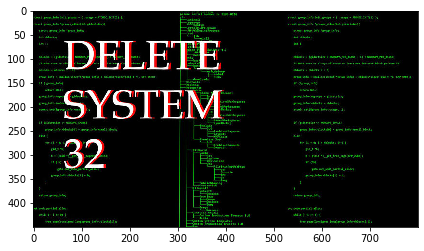

In [16]:
print(joketest)
from skimage import io
Oldest_image_output_1 = io.imread(img)
io.imshow(img)
io.show()